Use the Advanced Optimization benchmark from AC hugging face (https://huggingface.co/spaces/AccelerationConsortium/crabnet-hyperparameter)
- Optimize (minimize) y1
    - If y1 is greater than 0.2, the result is considered "bad" no matter how good the other values are
- Transfer learning: 
    - higher fidelity means more expensive computation 
    - treat fidelity1 = 0.5 as "source' and fidelity1 = 1.0 as "target"
- Multi-task: 
    - since y1 and y2 are correlated 
    - treat y1 as task1, then y2 as task 2

In [1]:
from baybe import Campaign
from baybe.objectives import SingleTargetObjective
from baybe.parameters import NumericalContinuousParameter, CategoricalParameter
from baybe.searchspace import SearchSpace
from baybe.targets import NumericalTarget
from baybe.constraints import ContinuousLinearInequalityConstraint
import numpy as np
import pandas as pd
import torch
# load the Advanced Optimization from AC huggingface
from gradio_client import Client
client = Client("AccelerationConsortium/crabnet-hyperparameter")

from baybe.utils.random import set_random_seed
#set_random_seed(17) 

# seed = 104 for x19 < x20 constraint error
# seed = 188 for x6+x15 <= 1.0 constraint error

Loaded as API: https://accelerationconsortium-crabnet-hyperparameter.hf.space ✔


In [2]:
# define the function 
def adv_opt(c1, c2, c3, x2, x3, x4, x5, x6, x7, x8, x9, x11, x12, x13, x14, x15, x16, x17, x18): 
    result = client.predict(
    	0.669938, # float (numeric value between 0.0 and 1.0) in 'x1' Slider component
		x2,	# float (numeric value between 0.0 and 1.0)	in 'x2' Slider component
		x3,	# float (numeric value between 0.0 and 1.0) in 'x3' Slider component
		x4,	# float (numeric value between 0.0 and 1.0) in 'x4' Slider component
		x5,	# float (numeric value between 0.0 and 1.0) in 'x5' Slider component
		x6,	# float (numeric value between 0.0 and 1.0) in 'x6' Slider component
		x7,	# float (numeric value between 0.0 and 1.0) in 'x7' Slider component
		x8,	# float (numeric value between 0.0 and 1.0) in 'x8' Slider component
		x9,	# float (numeric value between 0.0 and 1.0) in 'x9' Slider component
		0.5291,	# float (numeric value between 0.0 and 1.0) in 'x10' Slider component
		x11,	# float (numeric value between 0.0 and 1.0) in 'x11' Slider component
		x12,	# float (numeric value between 0.0 and 1.0000000000000002) in 'x12' Slider component
		x13,	# float (numeric value between 0.0 and 1.0) in 'x13' Slider component
		x14,	# float (numeric value between 0.0 and 1.0) in 'x14' Slider component
		x15,	# float (numeric value between 0.0 and 1.0) in 'x15' Slider component
		x16,	# float (numeric value between 0.0 and 1.0) in 'x16' Slider component
		x17,	# float (numeric value between 0.0 and 1.0) in 'x17' Slider component
		x18,	# float (numeric value between 0.0 and 1.0) in 'x18' Slider component
		0.079598,	# float (numeric value between 0.0 and 0.9999999999999998) in 'x19' Slider component
		0.632394,	# float (numeric value between 0.0 and 0.9999999999999998) in 'x20' Slider component
		c1,	# Literal['c1_0', 'c1_1'] in 'c1' Radio component
		c2,	# Literal['c2_0', 'c2_1'] in 'c2' Radio component
		c3,	# Literal['c3_0', 'c3_1', 'c3_2'] in 'c3' Radio component
		0.5,	# float (numeric value between 0.0 and 1.0) in 'fidelity1' Slider component
		api_name="/predict",
    )
    return result['data'][0][0]			# return y1 value only


# def adv_opt(**params):
#     result = client.predict(
#         params['x1'],  # float (numeric value between 0.0 and 1.0) in 'x1' Slider component
#         params['x2'],  # float (numeric value between 0.0 and 1.0) in 'x2' Slider component
#         params['x3'],  # float (numeric value between 0.0 and 1.0) in 'x3' Slider component
#         params['x4'],  # float (numeric value between 0.0 and 1.0) in 'x4' Slider component
#         params['x5'],  # float (numeric value between 0.0 and 1.0) in 'x5' Slider component
#         params['x6'],  # float (numeric value between 0.0 and 1.0) in 'x6' Slider component
#         params['x7'],  # float (numeric value between 0.0 and 1.0) in 'x7' Slider component
#         params['x8'],  # float (numeric value between 0.0 and 1.0) in 'x8' Slider component
#         params['x9'],  # float (numeric value between 0.0 and 1.0) in 'x9' Slider component
#         params['x10'], # float (numeric value between 0.0 and 1.0) in 'x10' Slider component
#         params['x11'], # float (numeric value between 0.0 and 1.0) in 'x11' Slider component
#         params['x12'], # float (numeric value between 0.0 and 1.0) in 'x12' Slider component
#         params['x13'], # float (numeric value between 0.0 and 1.0) in 'x13' Slider component
#         params['x14'], # float (numeric value between 0.0 and 1.0) in 'x14' Slider component
#         params['x15'], # float (numeric value between 0.0 and 1.0) in 'x15' Slider component
#         params['x16'], # float (numeric value between 0.0 and 1.0) in 'x16' Slider component
#         params['x17'], # float (numeric value between 0.0 and 1.0) in 'x17' Slider component
#         params['x18'], # float (numeric value between 0.0 and 1.0) in 'x18' Slider component
#         params['x19'], # float (numeric value between 0.0 and 1.0) in 'x19' Slider component
#         params['x20'], # float (numeric value between 0.0 and 1.0) in 'x20' Slider component
#         params['c1'],  # Literal['c1_0', 'c1_1'] in 'c1' Radio component
#         params['c2'],  # Literal['c2_0', 'c2_1'] in 'c2' Radio component
#         params['c3'],  # Literal['c3_0', 'c3_1', 'c3_2'] in 'c3' Radio component
#         0.5,           # float (numeric value between 0.0 and 1.0) in 'fidelity1' Slider component
#         api_name="/predict",
#     )
#     return result['data'][0][0]  # return y1 value only

WRAPPED_FUNCTION = adv_opt

In [3]:
# define and create the search space
parameters = [
    # NumericalContinuousParameter(name="x1", bounds=(0.0, 1.0)), 
    # NumericalContinuousParameter(name="x2", bounds=(0.0, 1.0)),
    # NumericalContinuousParameter(name="x3", bounds=(0.0, 1.0)),
    # NumericalContinuousParameter(name="x4", bounds=(0.0, 1.0)),
    # NumericalContinuousParameter(name="x5", bounds=(0.0, 1.0)),
    # NumericalContinuousParameter(name="x6", bounds=(0.0, 1.0)),
    # NumericalContinuousParameter(name="x7", bounds=(0.0, 1.0)),
    # NumericalContinuousParameter(name="x8", bounds=(0.0, 1.0)),
    # NumericalContinuousParameter(name="x9", bounds=(0.0, 1.0)),
    # NumericalContinuousParameter(name="x10", bounds=(0.0, 1.0)),
    # NumericalContinuousParameter(name="x11", bounds=(0.0, 1.0)),
    # NumericalContinuousParameter(name="x12", bounds=(0.0, 1.0)),
    # NumericalContinuousParameter(name="x13", bounds=(0.0, 1.0)),
    # NumericalContinuousParameter(name="x14", bounds=(0.0, 1.0)),
    # NumericalContinuousParameter(name="x15", bounds=(0.0, 1.0)),
    # NumericalContinuousParameter(name="x16", bounds=(0.0, 1.0)),
    # NumericalContinuousParameter(name="x17", bounds=(0.0, 1.0)),
    # NumericalContinuousParameter(name="x18", bounds=(0.0, 1.0)),
    # NumericalContinuousParameter(name="x19", bounds=(0.0, 1.0)),
    # NumericalContinuousParameter(name="x20", bounds=(0.0, 1.0)),
    
    # NumericalContinuousParameter(name="x1", bounds=(0.0, 1.0)), 
    NumericalContinuousParameter(name="x2", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x3", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x4", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x5", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x6", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x7", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x8", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x9", bounds=(0.0, 1.0)),
    #NumericalContinuousParameter(name="x10", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x11", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x12", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x13", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x14", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x15", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x16", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x17", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x18", bounds=(0.0, 1.0)),
    # NumericalContinuousParameter(name="x19", bounds=(0.0, 1.0)),
    # NumericalContinuousParameter(name="x20", bounds=(0.0, 1.0)),
    CategoricalParameter(name='c1', values=['c1_0', 'c1_1'], encoding="OHE"),
    CategoricalParameter(name='c2', values=['c2_0', 'c2_1'], encoding="OHE"),
    CategoricalParameter(name='c3', values=['c3_0', 'c3_1', 'c3_2'], encoding="OHE"),
]

constraints = [
    # ContinuousLinearInequalityConstraint(parameters=["x19", "x20"], coefficients=[-1.0, 1.0], rhs=0.0),
    ContinuousLinearInequalityConstraint(parameters=["x6", "x15"], coefficients=[-1.0, -1.0], rhs=-1.0), 
]

searchspace = SearchSpace.from_product(parameters=parameters, constraints=constraints)

# define objective
objective = SingleTargetObjective(target=NumericalTarget(name="Target", mode="MIN"))

# create campaign
campaign = Campaign(searchspace=searchspace, objective=objective)

In [4]:
from copy import deepcopy
random_seed_list = [17, 28, 42, 87, 99, 131, 518, 1047, 1598, 2024]
round = 50

results = pd.DataFrame()
for i in range(len(random_seed_list)):
    set_random_seed(random_seed_list[i])

    # copy the campaign
    campaign_i = deepcopy(campaign)

    for k in range(round): 
        recommendation = campaign_i.recommend(batch_size=1)
        # select the numerical columns
        numerical_cols = recommendation.select_dtypes(include='number')
        # replace values less than 1e-8 with 0 in numerical columns
        numerical_cols = numerical_cols.map(lambda x: 0 if x < 1e-6 else x)
        # update the original DataFrame
        recommendation.update(numerical_cols)

        # target value are looked up via the botorch wrapper
        target_values = []
        for index, row in recommendation.iterrows():
            # print(row.to_dict())
            # print(WRAPPED_FUNCTION(**row.to_dict()))
            target_values.append(WRAPPED_FUNCTION(**row.to_dict()))

        recommendation["Target"] = target_values

        campaign_i.add_measurements(recommendation)   
    results = pd.concat([results, campaign_i.measurements])

c:\Users\MF\anaconda3\envs\BayBE\lib\site-packages\botorch\acquisition\monte_carlo.py:393: NumericsWarning: qExpectedImprovement has known numerical issues that lead to suboptimal optimization performance. It is strongly recommended to simply replace

	 qExpectedImprovement 	 --> 	 qLogExpectedImprovement 

instead, which fixes the issues and has the same API. See https://arxiv.org/abs/2310.20708 for details.
  legacy_ei_numerics_warning(legacy_name=type(self).__name__)
c:\Users\MF\anaconda3\envs\BayBE\lib\site-packages\botorch\acquisition\monte_carlo.py:393: NumericsWarning: qExpectedImprovement has known numerical issues that lead to suboptimal optimization performance. It is strongly recommended to simply replace

	 qExpectedImprovement 	 --> 	 qLogExpectedImprovement 

instead, which fixes the issues and has the same API. See https://arxiv.org/abs/2310.20708 for details.
  legacy_ei_numerics_warning(legacy_name=type(self).__name__)
c:\Users\MF\anaconda3\envs\BayBE\lib\site-packages

In [11]:
results
# # loop break, append the result to yesterday's results
# yesterday = pd.read_csv('ranSeed17_50rounds.csv')
# drop_cols = ['Unnamed: 0']
# yesterday = yesterday.drop(columns=drop_cols)
# # append the results to yesterday's results
# results = pd.concat([yesterday, results])
# results

,c1,c2,c3,x2,x3,x4,x5,x6,x7,x8,...,x12,x13,x14,x15,x16,x17,x18,Target,BatchNr,FitNr
0,c1_0,c2_0,c3_2,0.902423,0.181264,0.442879,0.900581,0.303829,0.072849,0.825842,...,0.722187,0.312911,0.371415,0.020761,0.024800,0.701462,0.365847,0.384569,1,1.0
1,c1_1,c2_1,c3_1,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.081833,2,2.0
2,c1_1,c2_1,c3_0,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.363233,3,3.0
3,c1_0,c2_0,c3_0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.731910,4,4.0
4,c1_1,c2_0,c3_2,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.360749,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,c1_0,c2_0,c3_1,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.372926,0.994100,0.000000,0.000000,0.000000,0.000000,1.000000,0.335382,46,46.0
46,c1_1,c2_0,c3_2,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.343435,47,47.0
47,c1_0,c2_0,c3_0,1.000000,1.000000,0.000369,0.000000,1.000000,1.000000,0.000000,...,0.004966,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.356999,48,48.0
48,c1_1,c2_0,c3_0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.411171,0.000000,1.000000,0.311889,49,49.0


In [9]:
dff = results['Target'].to_numpy().reshape(10, 50)
np.savetxt('AdvOpt-BayBE.csv', dff)

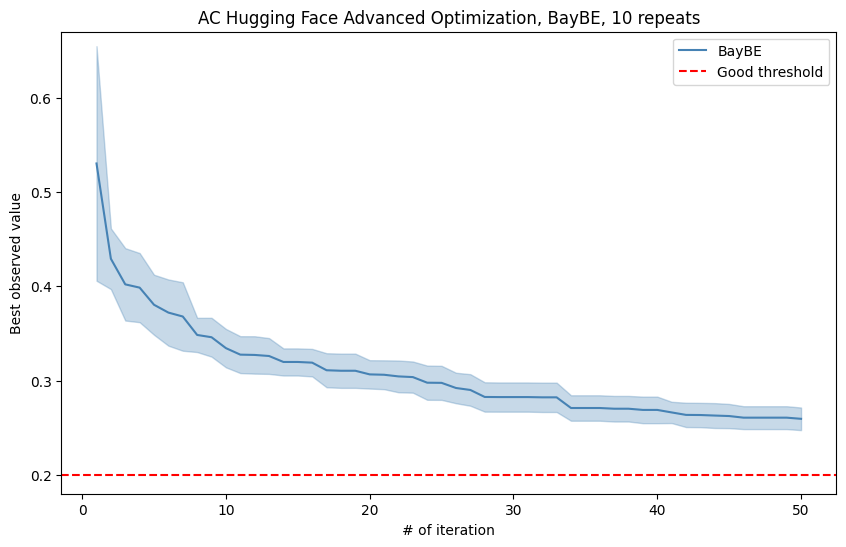

In [15]:
import matplotlib.pyplot as plt
ax_data = np.loadtxt('AdvOpt-BayBE.csv')
data = [ax_data] 
means = {}
stds = {}
for m, d in enumerate(data):
    x = d.copy()
    best_obj = np.array([np.minimum.accumulate(obj_i) for obj_i in x])
    means[m] = best_obj.mean(axis=0)
    stds[m] = best_obj.std(axis=0) / np.sqrt(best_obj.shape[0])

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
x = np.arange(1, len(means[0]) + 1)
colors = ['steelblue']
methods = ['BayBE']
for i, algo in enumerate(methods):
    ax.plot(x, means[i], label=algo, c=colors[i])
    ax.fill_between(x, means[i] - 2 * stds[i], means[i] + 2 * stds[i], color=colors[i], alpha=0.3)
ax.axhline(y = 0.2, c = 'r', ls = '--', label = "Good threshold")
ax.set_xlabel('# of iteration')
ax.set_ylabel('Best observed value')
ax.set_title('AC Hugging Face Advanced Optimization, BayBE, 10 repeats')
ax.set_ylim(0.18, 0.67)
ax.legend()

### Calling to API and make calculation

In [ ]:
result = client.predict(
		0.222,	# float (numeric value between 0.0 and 1.0) in 'x1' Slider component
		0.5,	# float (numeric value between 0.0 and 1.0)	in 'x2' Slider component
		0.445,	# float (numeric value between 0.0 and 1.0) in 'x3' Slider component
		0.1,	# float (numeric value between 0.0 and 1.0) in 'x4' Slider component
		0.5,	# float (numeric value between 0.0 and 1.0) in 'x5' Slider component
		0,	# float (numeric value between 0.0 and 1.0) in 'x6' Slider component
		0,	# float (numeric value between 0.0 and 1.0) in 'x7' Slider component
		0,	# float (numeric value between 0.0 and 1.0) in 'x8' Slider component
		0,	# float (numeric value between 0.0 and 1.0) in 'x9' Slider component
		0,	# float (numeric value between 0.0 and 1.0) in 'x10' Slider component
		0,	# float (numeric value between 0.0 and 1.0) in 'x11' Slider component
		0,	# float (numeric value between 0.0 and 1.0000000000000002) in 'x12' Slider component
		0,	# float (numeric value between 0.0 and 1.0) in 'x13' Slider component
		0,	# float (numeric value between 0.0 and 1.0) in 'x14' Slider component
		0,	# float (numeric value between 0.0 and 1.0) in 'x15' Slider component
		0,	# float (numeric value between 0.0 and 1.0) in 'x16' Slider component
		0,	# float (numeric value between 0.0 and 1.0) in 'x17' Slider component
		0,	# float (numeric value between 0.0 and 1.0) in 'x18' Slider component
		0,	# float (numeric value between 0.0 and 0.9999999999999998) in 'x19' Slider component
		0,	# float (numeric value between 0.0 and 0.9999999999999998) in 'x20' Slider component
		"c1_0",	# Literal['c1_0', 'c1_1'] in 'c1' Radio component
		"c2_0",	# Literal['c2_0', 'c2_1'] in 'c2' Radio component
		"c3_0",	# Literal['c3_0', 'c3_1', 'c3_2'] in 'c3' Radio component
		1.0,	# float (numeric value between 0.0 and 1.0) in 'fidelity1' Slider component
		api_name="/predict"
)
result

{'headers': ['y1', 'y2', 'y3', 'y4'],
 'data': [[0.615047572549943,
   1.1692076752435276,
   333.7806099566571,
   9993118.024114504]],
 'metadata': None}

In [ ]:
# get y1 only
result['data'][0][0]

0.615047572549943

### Wrap the API into a function

In [ ]:
paras = {'c1': 'c1_1', 'c2': 'c2_0', 'c3': 'c3_2', 'x1': 0.6118901958577212, 'x2': 0.4111829149245071, 'x3': 0.9669932071676511, 'x4': 0.4011947349568585, 'x5': 0.5327450665659677, 'x6': 0.21291356632372327, 'x7': 0.13115749846280078, 'x8': 0.3032873297687223, 'x9': 0.37433820950967467, 'x10': 0.6643725999349213, 'x11': 0.9719434718766504, 'x12': 0.20871047682655874, 'x13': 0.4884984758589027, 'x14': 0.5908026063989489, 'x15': 0.1366531028890536, 'x16': 0.7450997611208788, 'x17': 0.7656059548378924, 'x18': 0.8665776018638673, 'x19': 0.2905417268369886, 'x20': 0.8706679030815925}
adv_opt(**paras)
# WRAPPED_FUNCTION(**paras)

TypeError: adv_opt() got an unexpected keyword argument 'x1'